In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
train = pd.read_csv('train.csv', na_values=-1)

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train.shape

(595212, 59)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [27]:
test = pd.read_csv('test.csv', na_values=-1)

In [7]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [8]:
test.shape

(892816, 58)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [30]:
traintest = pd.concat([train,test])

C:\Users\Supratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
traintest

,id,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,...,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,target
0,7,0.6,0.5,0.2,3,1,10,1,10,1,...,0,0,11,0,1,0,0.7,0.2,0.718070,0.0
1,9,0.3,0.1,0.3,2,1,9,5,8,1,...,0,0,3,0,0,1,0.8,0.4,0.766078,0.0
2,13,0.5,0.7,0.1,2,2,9,1,8,2,...,0,0,12,1,0,0,0.0,0.0,-1.000000,0.0
3,16,0.6,0.9,0.1,2,4,7,1,8,4,...,0,0,8,1,0,0,0.9,0.2,0.580948,0.0
4,17,0.4,0.6,0.0,2,2,6,3,10,2,...,0,0,9,1,0,0,0.7,0.6,0.840759,0.0
5,19,0.7,0.8,0.4,3,1,8,2,11,3,...,0,0,6,1,0,0,0.9,1.8,2.332649,0.0
6,20,0.2,0.6,0.5,2,2,8,1,8,3,...,0,0,8,1,0,0,0.6,0.1,0.617454,0.0
7,22,0.1,0.5,0.1,1,2,7,1,6,1,...,0,0,13,1,0,0,0.7,0.4,0.607248,0.0
8,26,0.9,0.8,0.6,3,1,7,3,9,4,...,0,0,6,1,0,0,0.9,0.7,0.901388,0.0
9,28,0.7,0.8,0.8,2,2,8,2,9,1,...,0,0,4,0,0,1,0.9,1.4,2.316652,1.0


In [12]:
traintest.shape

(1488028, 59)

In [13]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488028 entries, 0 to 892815
Data columns (total 59 columns):
id                1488028 non-null int64
ps_calc_01        1488028 non-null float64
ps_calc_02        1488028 non-null float64
ps_calc_03        1488028 non-null float64
ps_calc_04        1488028 non-null int64
ps_calc_05        1488028 non-null int64
ps_calc_06        1488028 non-null int64
ps_calc_07        1488028 non-null int64
ps_calc_08        1488028 non-null int64
ps_calc_09        1488028 non-null int64
ps_calc_10        1488028 non-null int64
ps_calc_11        1488028 non-null int64
ps_calc_12        1488028 non-null int64
ps_calc_13        1488028 non-null int64
ps_calc_14        1488028 non-null int64
ps_calc_15_bin    1488028 non-null int64
ps_calc_16_bin    1488028 non-null int64
ps_calc_17_bin    1488028 non-null int64
ps_calc_18_bin    1488028 non-null int64
ps_calc_19_bin    1488028 non-null int64
ps_calc_20_bin    1488028 non-null int64
ps_car_01_cat     148

In [6]:
traintest.describe()

,id,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,...,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,target
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,...,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,595212.000000
mean,7.440135e+05,4.496817e-01,4.501073e-01,4.499718e-01,2.371666e+00,1.885551e+00,7.688461e+00,3.008052e+00,9.225874e+00,2.338736e+00,...,1.002669e-03,1.241038e-02,7.298086e+00,6.606838e-01,1.206718e-01,1.543620e-01,6.110305e-01,4.395943e-01,5.514848e-01,0.036448
std,4.295568e+05,2.872071e-01,2.871817e-01,2.872136e-01,1.117059e+00,1.136029e+00,1.333837e+00,1.414919e+00,1.460205e+00,1.247940e+00,...,3.164909e-02,1.273684e-01,3.543585e+00,4.734774e-01,3.257456e-01,3.612955e-01,2.876763e-01,4.045123e-01,7.938159e-01,0.187401
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000
25%,3.720068e+05,2.000000e-01,2.000000e-01,2.000000e-01,2.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-01,2.000000e-01,5.250000e-01,0.000000
50%,7.440135e+05,4.000000e-01,5.000000e-01,5.000000e-01,2.000000e+00,2.000000e+00,8.000000e+00,3.000000e+00,9.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01,3.000000e-01,7.211103e-01,0.000000
75%,1.116020e+06,7.000000e-01,7.000000e-01,7.000000e-01,3.000000e+00,3.000000e+00,9.000000e+00,4.000000e+00,1.000000e+01,3.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,6.000000e-01,1.001561e+00,0.000000
max,1.488027e+06,9.000000e-01,9.000000e-01,9.000000e-01,5.000000e+00,6.000000e+00,1.000000e+01,9.000000e+00,1.200000e+01,7.000000e+00,...,1.000000e+00,4.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e-01,1.800000e+00,4.423517e+00,1.000000


In [14]:
train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

# ps_car_03_cat, ps_car_05_cat & ps_reg_03 have too many missing values (-1)

In [19]:
traintest['ps_calc_01'].value_counts()

0.6    149327
0.0    149227
0.2    149157
0.5    149148
0.1    148797
0.8    148635
0.4    148527
0.3    148476
0.9    148411
0.7    148323
Name: ps_calc_01, dtype: int64

In [10]:
train.corr().loc['target',] [abs(train.corr().loc['target',]) > 0.03]

target           1.000000
ps_ind_06_bin   -0.034017
ps_ind_07_bin    0.034218
ps_ind_17_bin    0.037053
ps_reg_02        0.034800
ps_reg_03        0.030888
ps_car_02_cat   -0.031534
ps_car_03_cat    0.032401
ps_car_04_cat    0.032900
ps_car_07_cat   -0.036395
ps_car_12        0.038790
ps_car_13        0.053899
Name: target, dtype: float64

In [11]:
train.corr().loc['target',] [abs(train.corr().loc['target',]) > 0.03].index

Index(['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_17_bin',
       'ps_reg_02', 'ps_reg_03', 'ps_car_02_cat', 'ps_car_03_cat',
       'ps_car_04_cat', 'ps_car_07_cat', 'ps_car_12', 'ps_car_13'],
      dtype='object')

# Imputing median in variables with missing values

In [34]:
for i, feature in enumerate(list(train)):
    if train[feature].isnull().sum() > 0:
         train[feature+"_mod"] = train[feature].fillna(traintest[feature].median())
 
for i, feature in enumerate(list(test)):
    if test[feature].isnull().sum() > 0:
        test[feature+"_mod"]= test[feature].fillna(traintest[feature].median())

# Testing variables for significant chi-squared

In [20]:
from scipy import stats

In [114]:
train['target_mod'] = train['target'].map(lambda x: 2 if x==0 else x)
prob = 0.95
list_imp_features = []
for feature in cat_and_bin_features:
    f_obs = np.array([train[feature].values,train['target_mod'].values])
    stat, p, dof = stats.chi2_contingency(f_obs)[0:3]
    critical = stats.chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        list_imp_features.append(feature)
print(list_imp_features)

['ps_ind_05_cat_mod', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_11_cat']


# Upsampling positive Tragets

In [8]:
train_pos = train[train['target'] == 1]
train_neg = train[train['target'] == 0]
train_neg_sampled = train_neg.sample(n=21694)
train_upsampled = pd.concat([train_neg_sampled,train_pos])
print(train_upsampled.shape)
print(train_upsampled['target'].value_counts())

(43388, 69)
1    21694
0    21694
Name: target, dtype: int64


# Using all variables except ones with too many missing values and the original unimputed variables with missings in them

In [11]:
# Variables ps_reg_03, ps_car_03_cat and ps_car_05_cat are being dropped as they have too many missing values
#Other variables are being replced with the same variables augmented by imputing values for missings
X = train_upsampled.drop(['id','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat',
                          'ps_car_07_cat','ps_car_09_cat','ps_car_11','ps_car_12','ps_car_14','ps_ind_02_cat',
                          'ps_ind_04_cat','ps_ind_05_cat','ps_reg_03'], axis=1)
y = train_upsampled['target']

In [12]:
print(X.shape)
print(y.shape)

(43388, 55)
(43388,)


# Standard Scaling Continous Variables

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X.columns

Index(['target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_08_cat',
       'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_car_01_cat_mod',
       'ps_car_02_cat_mod', 'ps_car_07_cat_mod', 'ps_car_09_cat_mod',
       'ps_car_11_mod', 'ps_car_12_mod', 'ps_car_14_mod', 'ps_ind_02_cat_mod',
       'ps_ind_04_cat_mod', 'ps_ind_05_cat_mod'],
      dtype='

In [15]:
sc = StandardScaler()

scaled_X = pd.DataFrame(sc.fit_transform(X[['ps_ind_01', 'ps_ind_03', 
       'ps_ind_14', 'ps_ind_15', 'ps_reg_01','ps_reg_02', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_car_11_mod', 'ps_car_12_mod', 'ps_car_14_mod']]))

scaled_X.columns = ['ps_ind_01', 'ps_ind_03', 
       'ps_ind_14', 'ps_ind_15', 'ps_reg_01','ps_reg_02', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_car_11_mod', 'ps_car_12_mod', 'ps_car_14_mod']

scaled_X = scaled_X.reset_index(drop=True)

print(scaled_X.shape)

(43388, 25)


C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
scaled_test_X = pd.DataFrame(sc.transform(test[['ps_ind_01', 'ps_ind_03', 
       'ps_ind_14', 'ps_ind_15', 'ps_reg_01','ps_reg_02', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_car_11_mod', 'ps_car_12_mod', 'ps_car_14_mod']]))

scaled_test_X.columns = ['ps_ind_01', 'ps_ind_03', 
       'ps_ind_14', 'ps_ind_15', 'ps_reg_01','ps_reg_02', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_car_11_mod', 'ps_car_12_mod', 'ps_car_14_mod']

C:\Users\Supratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [17]:
scaled_test_X.shape

(892816, 25)

# One Hot Encoding Binary Variables

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
oh = OneHotEncoder()
ohencoded_x = oh.fit_transform(X[['ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin','ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin']])

C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
ohencoded_test_x = oh.transform(test[['ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin','ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin']])

In [21]:
oh_df = pd.DataFrame(ohencoded_x.toarray())
oh_df_test = pd.DataFrame(ohencoded_test_x.toarray())
print(oh_df.shape)
print(oh_df_test.shape)

(43388, 34)
(892816, 34)


# Mean Encoding Categorical Variables

In [22]:
X['ps_car_04_cat_enc'] = X['ps_car_04_cat'].map(X.groupby('ps_car_04_cat').target.mean())
X['ps_car_06_cat_enc'] = X['ps_car_06_cat'].map(X.groupby('ps_car_06_cat').target.mean())
X['ps_car_08_cat_enc'] = X['ps_car_08_cat'].map(X.groupby('ps_car_08_cat').target.mean())
X['ps_car_10_cat_enc'] = X['ps_car_10_cat'].map(X.groupby('ps_car_10_cat').target.mean())
X['ps_car_11_cat_enc'] = X['ps_car_11_cat'].map(X.groupby('ps_car_11_cat').target.mean())
X['ps_car_01_cat_mod_enc'] = X['ps_car_01_cat_mod'].map(X.groupby('ps_car_01_cat_mod').target.mean())
X['ps_car_02_cat_mod_enc'] = X['ps_car_02_cat_mod'].map(X.groupby('ps_car_02_cat_mod').target.mean())
X['ps_car_07_cat_mod_enc'] = X['ps_car_07_cat_mod'].map(X.groupby('ps_car_07_cat_mod').target.mean())
X['ps_car_09_cat_mod_enc'] = X['ps_car_09_cat_mod'].map(X.groupby('ps_car_09_cat_mod').target.mean())
X['ps_ind_02_cat_mod_enc'] = X['ps_ind_02_cat_mod'].map(X.groupby('ps_ind_02_cat_mod').target.mean())
X['ps_ind_04_cat_mod_enc'] = X['ps_ind_04_cat_mod'].map(X.groupby('ps_ind_04_cat_mod').target.mean())
X['ps_ind_05_cat_mod_enc'] = X['ps_ind_05_cat_mod'].map(X.groupby('ps_ind_05_cat_mod').target.mean())

In [23]:
test['ps_car_04_cat_enc'] = test['ps_car_04_cat'].map(X.groupby('ps_car_04_cat').target.mean())
test['ps_car_06_cat_enc'] = test['ps_car_06_cat'].map(X.groupby('ps_car_06_cat').target.mean())
test['ps_car_08_cat_enc'] = test['ps_car_08_cat'].map(X.groupby('ps_car_08_cat').target.mean())
test['ps_car_10_cat_enc'] = test['ps_car_10_cat'].map(X.groupby('ps_car_10_cat').target.mean())
test['ps_car_11_cat_enc'] = test['ps_car_11_cat'].map(X.groupby('ps_car_11_cat').target.mean())
test['ps_car_01_cat_mod_enc'] = test['ps_car_01_cat_mod'].map(X.groupby('ps_car_01_cat_mod').target.mean())
test['ps_car_02_cat_mod_enc'] = test['ps_car_02_cat_mod'].map(X.groupby('ps_car_02_cat_mod').target.mean())
test['ps_car_07_cat_mod_enc'] = test['ps_car_07_cat_mod'].map(X.groupby('ps_car_07_cat_mod').target.mean())
test['ps_car_09_cat_mod_enc'] = test['ps_car_09_cat_mod'].map(X.groupby('ps_car_09_cat_mod').target.mean())
test['ps_ind_02_cat_mod_enc'] = test['ps_ind_02_cat_mod'].map(X.groupby('ps_ind_02_cat_mod').target.mean())
test['ps_ind_04_cat_mod_enc'] = test['ps_ind_04_cat_mod'].map(X.groupby('ps_ind_04_cat_mod').target.mean())
test['ps_ind_05_cat_mod_enc'] = test['ps_ind_05_cat_mod'].map(X.groupby('ps_ind_05_cat_mod').target.mean())

In [24]:
mean_encoded = X[['ps_car_04_cat_enc','ps_car_06_cat_enc',
                                               'ps_car_08_cat_enc','ps_car_10_cat_enc','ps_car_11_cat_enc',
                                               'ps_car_01_cat_mod_enc','ps_car_02_cat_mod_enc',
                                              'ps_car_07_cat_mod_enc','ps_car_09_cat_mod_enc',
                                              'ps_ind_02_cat_mod_enc','ps_ind_04_cat_mod_enc',
                                              'ps_ind_05_cat_mod_enc']].reset_index(drop=True)

In [25]:
mean_encoded.shape

(43388, 12)

In [26]:
test_mean_encoded = test[['ps_car_04_cat_enc','ps_car_06_cat_enc',
                                               'ps_car_08_cat_enc','ps_car_10_cat_enc','ps_car_11_cat_enc',
                                               'ps_car_01_cat_mod_enc','ps_car_02_cat_mod_enc',
                                              'ps_car_07_cat_mod_enc','ps_car_09_cat_mod_enc',
                                              'ps_ind_02_cat_mod_enc','ps_ind_04_cat_mod_enc',
                                              'ps_ind_05_cat_mod_enc']].reset_index(drop=True)

In [27]:
test_mean_encoded.shape

(892816, 12)

In [28]:
X_new = pd.concat([scaled_X, oh_df, mean_encoded], axis=1)

In [29]:
X_new.shape

(43388, 71)

In [30]:
test_new = pd.concat([scaled_test_X, oh_df_test, test_mean_encoded], axis=1)

In [31]:
y=y.reset_index(drop=True)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 123)

# Also using a set of unscaled and unencoded values

In [121]:
X_orig =train.drop(['id','target','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat',
                          'ps_car_07_cat','ps_car_09_cat','ps_car_11','ps_car_12','ps_car_14','ps_ind_02_cat',
                          'ps_ind_04_cat','ps_ind_05_cat','ps_reg_03'], axis=1)
y_orig = train['target']

# Dropping 'ps_calc' features which do not show any relationship with other features

In [122]:
col_to_drop = list(X_orig.columns[X_orig.columns.str.startswith('ps_calc_')])
X_orig = X_orig.drop(col_to_drop, axis=1)  

In [123]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = \
    train_test_split(X_orig, y_orig, test_size = 0.2, random_state = 123)

# Define Normalized Gini Function

In [36]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

# Using predict method of sklearn Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression 

In [56]:
lr = LogisticRegression()

In [132]:
lr.fit(X_train, y_train)

C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [133]:
predictions = lr.predict(X_test)

In [134]:
pd.Series(predictions).value_counts()

0    4515
1    4163
dtype: int64

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [136]:
print("accuracy_score: ", accuracy_score(y_test, predictions))
print("confusion_matrix: \n", confusion_matrix(y_test, predictions))
print("classification_report: \n", classification_report(y_test, predictions))

accuracy_score:  0.5800875777828993
confusion_matrix: 
 [[2556 1685]
 [1959 2478]]
classification_report: 
               precision    recall  f1-score   support

           0       0.57      0.60      0.58      4241
           1       0.60      0.56      0.58      4437

   micro avg       0.58      0.58      0.58      8678
   macro avg       0.58      0.58      0.58      8678
weighted avg       0.58      0.58      0.58      8678



In [137]:
gini_predictions = gini(y_test, predictions)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.041, Max. Gini: 0.244, Normalized Gini: 0.166


# Using predict_proba method of sklearn Logistic

In [138]:
predicted_probs = list(map(lambda x: x[1],lr.predict_proba(X_test)))

In [109]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds =roc_curve(y_test, predicted_probs)

def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

threshold=cutoff_youdens_j(fpr,tpr,thresholds)

print(threshold)

In [140]:
predictions_new = list(map(lambda x: 1 if x > threshold else 0,predicted_probs))

In [141]:
print("accuracy_score: ", accuracy_score(y_test, predictions_new))
print("confusion_matrix: \n", confusion_matrix(y_test, predictions_new))
print("classification_report: \n", classification_report(y_test, predictions_new))

accuracy_score:  0.5873473150495506
confusion_matrix: 
 [[2405 1836]
 [1745 2692]]
classification_report: 
               precision    recall  f1-score   support

           0       0.58      0.57      0.57      4241
           1       0.59      0.61      0.60      4437

   micro avg       0.59      0.59      0.59      8678
   macro avg       0.59      0.59      0.59      8678
weighted avg       0.59      0.59      0.59      8678



In [142]:
gini_predictions = gini(y_test, predicted_probs)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, predicted_probs)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.057, Max. Gini: 0.244, Normalized Gini: 0.233


# Using predict method of statsmodels Logistic

In [144]:
import statsmodels.formula.api as smf

In [35]:
X_train.columns = ['psind01','psind03','psind14','psind15','psreg01','psreg02','pscar13','pscar15',
                   'pscalc01','pscalc02','pscalc03','pscalc04','pscalc05','pscalc06','pscalc07',
                   'pscalc08','pscalc09','pscalc10','pscalc11','pscalc12','pscalc13','pscalc14',
                   'pscar11mod','pscar12mod','pscar14mod','OH0','OH1','OH2','OH3','OH4','OH5','OH6','OH7','OH8',
                   'OH9','OH10','OH11','OH12','OH13','OH14','OH15','OH16','OH17','OH18','OH19','OH20','OH21',
                   'OH22','OH23','OH24','OH25','OH26','OH27','OH28','OH29','OH30','OH31','OH32','OH33',
                   'pscar04catenc','pscar06catenc','pscar08catenc','pscar10catenc','pscar11catenc',
                   'pscar01catmodenc','pscar02catmodenc','pscar07catmodenc','pscar09catmodenc','psind02catmodenc',
                   'psind04catmodenc','psind05catmodenc']

In [36]:
X_test.columns = ['psind01','psind03','psind14','psind15','psreg01','psreg02','pscar13','pscar15',
                   'pscalc01','pscalc02','pscalc03','pscalc04','pscalc05','pscalc06','pscalc07',
                   'pscalc08','pscalc09','pscalc10','pscalc11','pscalc12','pscalc13','pscalc14',
                   'pscar11mod','pscar12mod','pscar14mod','OH0','OH1','OH2','OH3','OH4','OH5','OH6','OH7','OH8',
                   'OH9','OH10','OH11','OH12','OH13','OH14','OH15','OH16','OH17','OH18','OH19','OH20','OH21',
                   'OH22','OH23','OH24','OH25','OH26','OH27','OH28','OH29','OH30','OH31','OH32','OH33',
                   'pscar04catenc','pscar06catenc','pscar08catenc','pscar10catenc','pscar11catenc',
                   'pscar01catmodenc','pscar02catmodenc','pscar07catmodenc','pscar09catmodenc','psind02catmodenc',
                   'psind04catmodenc','psind05catmodenc']

In [37]:
test_new.columns = ['psind01','psind03','psind14','psind15','psreg01','psreg02','pscar13','pscar15',
                   'pscalc01','pscalc02','pscalc03','pscalc04','pscalc05','pscalc06','pscalc07',
                   'pscalc08','pscalc09','pscalc10','pscalc11','pscalc12','pscalc13','pscalc14',
                   'pscar11mod','pscar12mod','pscar14mod','OH0','OH1','OH2','OH3','OH4','OH5','OH6','OH7','OH8',
                   'OH9','OH10','OH11','OH12','OH13','OH14','OH15','OH16','OH17','OH18','OH19','OH20','OH21',
                   'OH22','OH23','OH24','OH25','OH26','OH27','OH28','OH29','OH30','OH31','OH32','OH33',
                   'pscar04catenc','pscar06catenc','pscar08catenc','pscar10catenc','pscar11catenc',
                   'pscar01catmodenc','pscar02catmodenc','pscar07catmodenc','pscar09catmodenc','psind02catmodenc',
                   'psind04catmodenc','psind05catmodenc']

In [187]:
X_train_logistic = X_train.copy()
X_train_logistic['target']=y_train

In [188]:
model = '''target ~ psind01+psind03+psind14+psind15+psreg01+psreg02+pscar13+pscar15+
                   pscalc01+pscalc02+pscalc03+pscalc04+pscalc05+pscalc06+pscalc07+
                   pscalc08+pscalc09+pscalc10+pscalc11+pscalc12+pscalc13+pscalc14+
                   pscar11mod+pscar12mod+pscar14mod+OH0+OH1+OH2+OH3+OH4+OH5+OH6+OH7+OH8+OH9+OH10+
                   OH11+OH12+OH13+OH14+OH15+OH16+OH17+OH18+OH19+OH20+OH21+OH22+OH23+OH24+OH25+OH26+OH27+OH28+OH29+
                   OH30+OH31+OH32+OH33+pscar04catenc+pscar06catenc+pscar08catenc+
                   pscar10catenc+pscar11catenc+pscar01catmodenc+pscar02catmodenc+
                   pscar07catmodenc+pscar09catmodenc+psind02catmodenc+psind04catmodenc+
                   psind05catmodenc'''
results = smf.logit(formula = model, data=X_train_logistic, missing='drop').fit()

         Current function value: 0.666286
         Iterations: 35


C:\Users\Supratik\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [189]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                34710
Model:                          Logit   Df Residuals:                    34657
Method:                           MLE   Df Model:                           52
Date:                Wed, 03 Jul 2019   Pseudo R-squ.:                 0.03873
Time:                        21:42:14   Log-Likelihood:                -23127.
converged:                      False   LL-Null:                       -24059.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0287        nan        nan        nan         nan         nan
psind01              0.0341      0.012      2.754      0.006       0.010       0.058
psind03              0.0445 

In [190]:
pred_prob_stat = results.predict(X_test)

fpr, tpr, thresholds =roc_curve(y_test, pred_prob_stat)

threshold=cutoff_youdens_j(fpr,tpr,thresholds)

print(threshold)

0.5002111834572159


In [191]:
predictions_stats = list(map(lambda x: 1 if x > threshold else 0,pred_prob_stat))

In [192]:
print("accuracy_score: ", accuracy_score(y_test, predictions_stats))
print("confusion_matrix: \n", confusion_matrix(y_test, predictions_stats))
print("classification_report: \n", classification_report(y_test, predictions_stats))

accuracy_score:  0.5858492740262733
confusion_matrix: 
 [[2596 1645]
 [1949 2488]]
classification_report: 
               precision    recall  f1-score   support

           0       0.57      0.61      0.59      4241
           1       0.60      0.56      0.58      4437

   micro avg       0.59      0.59      0.59      8678
   macro avg       0.59      0.59      0.59      8678
weighted avg       0.59      0.59      0.59      8678



In [193]:
# Gini with target 1/0
gini_predictions = gini(y_test, predictions_stats)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, predictions_stats)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.043, Max. Gini: 0.244, Normalized Gini: 0.178


In [194]:
# Gini with predicted probabilities
gini_predictions = gini(y_test, pred_prob_stat)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, pred_prob_stat)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.057, Max. Gini: 0.244, Normalized Gini: 0.235


In [149]:
test_pred = results.predict(test)

In [151]:
submission = pd.concat([test['id'], pd.DataFrame({'target':test_pred})], axis=1)
submission.to_csv('submission.csv', index=False)

# Using Random Forest Classifier on all variables

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
RF = RandomForestClassifier(
    n_estimators=1000,
    criterion='gini',
    max_depth=2**10,
    min_samples_split=2,
    min_samples_leaf=0.02,
    min_weight_fraction_leaf=0.0,
    max_features=0.8,
    max_leaf_nodes=None,
    n_jobs=-1,
    random_state=123,
    verbose=1)

In [197]:
RF.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1024, max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.02, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=123, verbose=1, warm_start=False)

In [198]:
RF_preds = RF.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished


In [199]:
print("accuracy_score: ", accuracy_score(y_test, RF_preds))
print("confusion_matrix: \n", confusion_matrix(y_test, RF_preds))
print("classification_report: \n", classification_report(y_test, RF_preds))

accuracy_score:  0.5795114081585618
confusion_matrix: 
 [[2549 1692]
 [1957 2480]]
classification_report: 
               precision    recall  f1-score   support

           0       0.57      0.60      0.58      4241
           1       0.59      0.56      0.58      4437

   micro avg       0.58      0.58      0.58      8678
   macro avg       0.58      0.58      0.58      8678
weighted avg       0.58      0.58      0.58      8678



In [200]:
gini_predictions = gini(y_test, RF_preds)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, RF_preds)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.040, Max. Gini: 0.244, Normalized Gini: 0.166


In [201]:
RF_pred_prob = list(map(lambda x: x[1],RF.predict_proba(X_test)))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished


In [202]:
gini_predictions = gini(y_test, RF_pred_prob)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, RF_pred_prob)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.056, Max. Gini: 0.244, Normalized Gini: 0.229


In [81]:
test_pred = RF.predict(test.drop(['id','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat',
                          'ps_car_07_cat','ps_car_09_cat','ps_car_11','ps_car_12','ps_car_14','ps_ind_02_cat',
                          'ps_ind_04_cat','ps_ind_05_cat','ps_reg_03'], axis=1))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   39.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   50.2s finished


In [83]:
submission = pd.concat([test['id'], pd.DataFrame({'target':test_pred})], axis=1)
submission.to_csv('submission.csv', index=False)

# Using XGBoost Classifier

In [ ]:
!pip install xgboost

In [37]:
import xgboost as xgb

In [130]:
# Set up classifier
xg_cl = xgb.XGBClassifier(    
                        n_estimators=500, #172
                        max_depth=4,
                        objective="binary:logistic",
                        learning_rate=0.07, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                        random_state=123
                        )

In [40]:
'''xg_cl = xgb.XGBClassifier(n_estimators=200,
                        max_depth=4,
                        objective="binary:logistic",
                        learning_rate=.1, 
                        subsample=.8, 
                        colsample_bytree=.8,
                        gamma=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        nthread=2)'''

'xg_cl = xgb.XGBClassifier(n_estimators=200,\n                        max_depth=4,\n                        objective="binary:logistic",\n                        learning_rate=.1, \n                        subsample=.8, \n                        colsample_bytree=.8,\n                        gamma=1,\n                        reg_alpha=0,\n                        reg_lambda=1,\n                        nthread=2)'

In [41]:
def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = 1 - gini_normalized(labels, preds)
    return [('gini', gini_score)]

In [131]:
eval_set = [(X_train_orig, y_train_orig), (X_test_orig, y_test_orig)]
xg_cl.fit(X_train_orig, y_train_orig, early_stopping_rounds=50, eval_metric=gini_xgb, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.934294	validation_1-gini:0.903067
Multiple eval metrics have been passed: 'validation_1-gini' will be used for early stopping.

Will train until validation_1-gini hasn't improved in 50 rounds.
[1]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.891728	validation_1-gini:0.861215
[2]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.830153	validation_1-gini:0.813576
[3]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.820547	validation_1-gini:0.805174
[4]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.815579	validation_1-gini:0.805589
[5]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.805036	validation_1-gini:0.795314
[6]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.805701	validation_1-gini:0.795406
[7]	validation_0-error:0.036197	validation_

[71]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.726664	validation_1-gini:0.737385
[72]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.725593	validation_1-gini:0.736604
[73]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.724843	validation_1-gini:0.73609
[74]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.724296	validation_1-gini:0.736099
[75]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.723468	validation_1-gini:0.73552
[76]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.723172	validation_1-gini:0.735327
[77]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.722626	validation_1-gini:0.734761
[78]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.722406	validation_1-gini:0.734541
[79]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.7

[143]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705944	validation_1-gini:0.721121
[144]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705679	validation_1-gini:0.720957
[145]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705679	validation_1-gini:0.720957
[146]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705679	validation_1-gini:0.720957
[147]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705679	validation_1-gini:0.720957
[148]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705565	validation_1-gini:0.720851
[149]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705565	validation_1-gini:0.720851
[150]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.705565	validation_1-gini:0.720851
[151]	validation_0-error:0.036197	validation_1-error:0.037449	validation

[214]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703476	validation_1-gini:0.719874
[215]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703476	validation_1-gini:0.719874
[216]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703423	validation_1-gini:0.719812
[217]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703423	validation_1-gini:0.719812
[218]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703423	validation_1-gini:0.719812
[219]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703321	validation_1-gini:0.71983
[220]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703321	validation_1-gini:0.71983
[221]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.703238	validation_1-gini:0.719859
[222]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0

[285]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701917	validation_1-gini:0.719316
[286]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701847	validation_1-gini:0.719183
[287]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701847	validation_1-gini:0.719183
[288]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701768	validation_1-gini:0.719149
[289]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701768	validation_1-gini:0.719149
[290]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701768	validation_1-gini:0.719149
[291]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701768	validation_1-gini:0.719149
[292]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.701768	validation_1-gini:0.719149
[293]	validation_0-error:0.036197	validation_1-error:0.037449	validation

[356]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.70083	validation_1-gini:0.718704
[357]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.70083	validation_1-gini:0.718704
[358]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.70083	validation_1-gini:0.718704
[359]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.70083	validation_1-gini:0.718704
[360]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.700755	validation_1-gini:0.718711
[361]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.700755	validation_1-gini:0.718711
[362]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.700755	validation_1-gini:0.718711
[363]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.700755	validation_1-gini:0.718711
[364]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-g

[427]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699915	validation_1-gini:0.718359
[428]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699915	validation_1-gini:0.718359
[429]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699915	validation_1-gini:0.718359
[430]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699817	validation_1-gini:0.718285
[431]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699683	validation_1-gini:0.718233
[432]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699683	validation_1-gini:0.718233
[433]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699683	validation_1-gini:0.718233
[434]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699652	validation_1-gini:0.718234
[435]	validation_0-error:0.036197	validation_1-error:0.037449	validation

[498]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699119	validation_1-gini:0.717831
[499]	validation_0-error:0.036197	validation_1-error:0.037449	validation_0-gini:0.699119	validation_1-gini:0.717831


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=10,
       learning_rate=0.07, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=123,
       reg_alpha=8, reg_lambda=1.3, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [42]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_cl.fit(X_train, y_train, early_stopping_rounds=50, eval_metric=gini_xgb, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.44068	validation_1-error:0.445033	validation_0-gini:0.814985	validation_1-gini:0.820908
Multiple eval metrics have been passed: 'validation_1-gini' will be used for early stopping.

Will train until validation_1-gini hasn't improved in 50 rounds.
[1]	validation_0-error:0.423596	validation_1-error:0.427287	validation_0-gini:0.77465	validation_1-gini:0.779562
[2]	validation_0-error:0.41501	validation_1-error:0.414957	validation_0-gini:0.757424	validation_1-gini:0.761591
[3]	validation_0-error:0.414549	validation_1-error:0.415764	validation_0-gini:0.757062	validation_1-gini:0.759868
[4]	validation_0-error:0.414866	validation_1-error:0.41392	validation_0-gini:0.752634	validation_1-gini:0.75714
[5]	validation_0-error:0.413858	validation_1-error:0.413575	validation_0-gini:0.751532	validation_1-gini:0.758018
[6]	validation_0-error:0.414751	validation_1-error:0.41392	validation_0-gini:0.753839	validation_1-gini:0.760337
[7]	validation_0-error:0.413598	validation_1-erro

[71]	validation_0-error:0.395621	validation_1-error:0.399401	validation_0-gini:0.70334	validation_1-gini:0.716037
[72]	validation_0-error:0.395765	validation_1-error:0.399401	validation_0-gini:0.703065	validation_1-gini:0.716008
[73]	validation_0-error:0.395477	validation_1-error:0.399286	validation_0-gini:0.7029	validation_1-gini:0.715944
[74]	validation_0-error:0.395448	validation_1-error:0.399286	validation_0-gini:0.7029	validation_1-gini:0.715944
[75]	validation_0-error:0.395736	validation_1-error:0.399516	validation_0-gini:0.702791	validation_1-gini:0.715969
[76]	validation_0-error:0.395707	validation_1-error:0.400323	validation_0-gini:0.702703	validation_1-gini:0.71575
[77]	validation_0-error:0.395678	validation_1-error:0.399977	validation_0-gini:0.702577	validation_1-gini:0.715176
[78]	validation_0-error:0.395851	validation_1-error:0.400207	validation_0-gini:0.702577	validation_1-gini:0.715176
[79]	validation_0-error:0.395707	validation_1-error:0.399977	validation_0-gini:0.70257

[143]	validation_0-error:0.394008	validation_1-error:0.397788	validation_0-gini:0.698606	validation_1-gini:0.713279
[144]	validation_0-error:0.394036	validation_1-error:0.397672	validation_0-gini:0.698606	validation_1-gini:0.713279
[145]	validation_0-error:0.394008	validation_1-error:0.398018	validation_0-gini:0.698449	validation_1-gini:0.713019
[146]	validation_0-error:0.394008	validation_1-error:0.398018	validation_0-gini:0.698449	validation_1-gini:0.713019
[147]	validation_0-error:0.394008	validation_1-error:0.398018	validation_0-gini:0.698448	validation_1-gini:0.713019
[148]	validation_0-error:0.393921	validation_1-error:0.397788	validation_0-gini:0.698459	validation_1-gini:0.713183
[149]	validation_0-error:0.393748	validation_1-error:0.397903	validation_0-gini:0.698352	validation_1-gini:0.713064
[150]	validation_0-error:0.393863	validation_1-error:0.398248	validation_0-gini:0.698352	validation_1-gini:0.713064
[151]	validation_0-error:0.394036	validation_1-error:0.397788	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=10,
       learning_rate=0.07, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=172, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=123,
       reg_alpha=8, reg_lambda=1.3, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [132]:
results = xg_cl.evals_result()

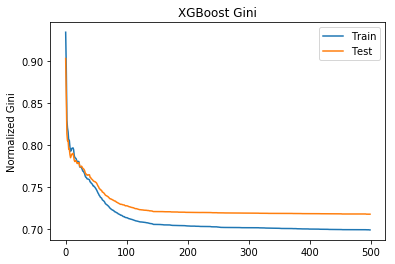

"fig, ax = plt.subplots()\nax.plot(x_axis, results['validation_0']['error'], label='Train')\nax.plot(x_axis, results['validation_1']['error'], label='Test')\nax.legend()\nplt.ylabel('Classification Error')\nplt.title('XGBoost Classification Error')\nplt.show()"

In [133]:
epochs = len(results['validation_0']['gini'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['gini'], label='Train')
ax.plot(x_axis, results['validation_1']['gini'], label='Test')
ax.legend()
plt.ylabel('Normalized Gini')
plt.title('XGBoost Gini')
plt.show()
# plot classification error
'''fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()'''

In [134]:
pred_xg = xg_cl.predict(X_test_orig)

In [45]:
pred_xg = xg_cl.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [135]:
print("accuracy_score: ", accuracy_score(y_test_orig, pred_xg))
print("confusion_matrix: \n", confusion_matrix(y_test_orig, pred_xg))
print("classification_report: \n", classification_report(y_test_orig, pred_xg))

accuracy_score:  0.9625513469922633
confusion_matrix: 
 [[114585      0]
 [  4458      0]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    114585
           1       0.00      0.00      0.00      4458

   micro avg       0.96      0.96      0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.94    119043



C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
print("accuracy_score: ", accuracy_score(y_test, pred_xg))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_xg))
print("classification_report: \n", classification_report(y_test, pred_xg))

accuracy_score:  0.6033648306061304
confusion_matrix: 
 [[2671 1570]
 [1872 2565]]
classification_report: 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61      4241
           1       0.62      0.58      0.60      4437

   micro avg       0.60      0.60      0.60      8678
   macro avg       0.60      0.60      0.60      8678
weighted avg       0.60      0.60      0.60      8678



In [63]:
gini_predictions = gini(y_test_orig, pred_xg)
gini_max = gini(y_test_orig, y_test_orig)
ngini= gini_normalized(y_test_orig, pred_xg)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.050, Max. Gini: 0.244, Normalized Gini: 0.203


In [48]:
gini_predictions = gini(y_test, pred_xg)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, pred_xg)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.052, Max. Gini: 0.244, Normalized Gini: 0.212


In [64]:
XGB_pred_prob = list(map(lambda x: x[1],xg_cl.predict_proba(X_test_orig)))

In [49]:
XGB_pred_prob = list(map(lambda x: x[1],xg_cl.predict_proba(X_test)))

In [65]:
gini_predictions = gini(y_test_orig, XGB_pred_prob)
gini_max = gini(y_test_orig, y_test_orig)
ngini= gini_normalized(y_test_orig, XGB_pred_prob)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.069, Max. Gini: 0.244, Normalized Gini: 0.281


In [50]:
gini_predictions = gini(y_test, XGB_pred_prob)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, XGB_pred_prob)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.070, Max. Gini: 0.244, Normalized Gini: 0.288


In [91]:
X_train_orig.shape

(34710, 34)

In [88]:
test_unscaled = test.drop(['id','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat',
                          'ps_car_07_cat','ps_car_09_cat','ps_car_11','ps_car_12','ps_car_14','ps_ind_02_cat',
                          'ps_ind_04_cat','ps_ind_05_cat','ps_reg_03','ps_car_04_cat_enc', 'ps_car_06_cat_enc', 'ps_car_08_cat_enc',
       'ps_car_10_cat_enc', 'ps_car_11_cat_enc', 'ps_car_01_cat_mod_enc',
       'ps_car_02_cat_mod_enc', 'ps_car_07_cat_mod_enc',
       'ps_car_09_cat_mod_enc', 'ps_ind_02_cat_mod_enc',
       'ps_ind_04_cat_mod_enc', 'ps_ind_05_cat_mod_enc'], axis=1)

In [95]:
test_unscaled = test_unscaled.drop(col_to_drop, axis=1)

In [92]:
test_pred = list(map(lambda x: x[1],xg_cl.predict_proba(test_unscaled)))

In [96]:
test_pred = list(map(lambda x: x[1],xg_cl.predict_proba(test_unscaled)))

In [97]:
submission = pd.concat([test['id'], pd.DataFrame({'target':test_pred})], axis=1)
submission.to_csv('submission.csv', index=False)

# Light GBM Model

In [ ]:
!pip install lightgbm

In [98]:
import lightgbm as lgb

In [124]:
lgb_params = {
                'learning_rate': 0.02,
                'num_iterations': 700,
                'max_bin': 15,
                'subsample': 0.8,
                'subsample_freq': 10,
                'colsample_bytree': 0.8,
                'min_child_samples': 800,
                'random_state': 123,
                'scale_pos_weight':3
             }

model_lgb = lgb.train(lgb_params, lgb.Dataset(X_train_orig, label=y_train_orig), 100)

C:\Users\Supratik\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [212]:
lgb_params = {
               'feature_fraction': 0.70, #0.50
               'feature_fraction_seed':1000,
               'metric': 'binary_logloss',
               'nthread':-1, 
               'min_data_in_leaf': 2**4, 
               'bagging_fraction': 0.50, #0.50
               'bagging_freq':1,
               'learning_rate': 0.03, #0.03
               'objective': 'binary', 
               'bagging_seed': 1000, 
               'num_leaves': 2**17,#2**15
               'max_depth':2**10,
               'verbose':1,
               'random_state':123,
               #'categorical_feature': '''name:ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,
                #                         ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_mod,ps_ind_04_cat_mod,
                 #                        ps_ind_05_cat_mod,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,
                 #                        ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,
                  #                       ps_ind_17_bin,ps_ind_18_bin,ps_car_01_cat_mod,ps_car_02_cat_mod,
                  #                       ps_car_04_cat,ps_car_06_cat,ps_car_07_cat_mod,ps_car_08_cat,
                   #                      ps_car_09_cat_mod,ps_car_10_cat,ps_car_11_cat'''
              }

model_lgb = lgb.train(lgb_params, lgb.Dataset(X_train, label=y_train), 100)

In [125]:
from sklearn.metrics import r2_score
pred_lgb = model_lgb.predict(X_test_orig)
print('Test R-squared for LightGBM is %f' % r2_score(y_test_orig, pred_lgb))

Test R-squared for LightGBM is 0.011037


In [213]:
from sklearn.metrics import r2_score
pred_lgb = model_lgb.predict(X_test)
print('Test R-squared for LightGBM is %f' % r2_score(y_test, pred_lgb))

Test R-squared for LightGBM is 0.032001


In [126]:
fpr, tpr, thresholds =roc_curve(y_test_orig, pred_lgb)

threshold=cutoff_youdens_j(fpr,tpr,thresholds)

print(threshold)

0.038880264928686174


In [214]:
fpr, tpr, thresholds =roc_curve(y_test, pred_lgb)

threshold=cutoff_youdens_j(fpr,tpr,thresholds)

print(threshold)

0.47667327541317334


In [111]:
predictions_lgb = list(map(lambda x: 1 if x > threshold else 0,pred_lgb))

In [215]:
predictions_lgb = list(map(lambda x: 1 if x > threshold else 0,pred_lgb))

In [112]:
print("accuracy_score: ", accuracy_score(y_test_orig, predictions_lgb))
print("confusion_matrix: \n", confusion_matrix(y_test_orig, predictions_lgb))
print("classification_report: \n", classification_report(y_test_orig, predictions_lgb))

accuracy_score:  0.6075132519013597
confusion_matrix: 
 [[2639 1602]
 [1804 2633]]
classification_report: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.61      4241
           1       0.62      0.59      0.61      4437

   micro avg       0.61      0.61      0.61      8678
   macro avg       0.61      0.61      0.61      8678
weighted avg       0.61      0.61      0.61      8678



In [216]:
print("accuracy_score: ", accuracy_score(y_test, predictions_lgb))
print("confusion_matrix: \n", confusion_matrix(y_test, predictions_lgb))
print("classification_report: \n", classification_report(y_test, predictions_lgb))

accuracy_score:  0.5826227241299838
confusion_matrix: 
 [[2239 2002]
 [1620 2817]]
classification_report: 
               precision    recall  f1-score   support

           0       0.58      0.53      0.55      4241
           1       0.58      0.63      0.61      4437

   micro avg       0.58      0.58      0.58      8678
   macro avg       0.58      0.58      0.58      8678
weighted avg       0.58      0.58      0.58      8678



In [113]:
gini_predictions = gini(y_test_orig, predictions_lgb)
gini_max = gini(y_test_orig, y_test_orig)
ngini= gini_normalized(y_test_orig, predictions_lgb)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.054, Max. Gini: 0.244, Normalized Gini: 0.222


In [217]:
gini_predictions = gini(y_test, predictions_lgb)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, predictions_lgb)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.041, Max. Gini: 0.244, Normalized Gini: 0.169


In [127]:
gini_predictions = gini(y_test_orig, pred_lgb)
gini_max = gini(y_test_orig, y_test_orig)
ngini= gini_normalized(y_test_orig, pred_lgb)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.136, Max. Gini: 0.481, Normalized Gini: 0.282


In [218]:
gini_predictions = gini(y_test, pred_lgb)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, pred_lgb)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.054, Max. Gini: 0.244, Normalized Gini: 0.222


In [128]:
test_pred = model_lgb.predict(test_unscaled)

In [129]:
submission = pd.concat([test['id'], pd.DataFrame({'target':test_pred})], axis=1)
submission.to_csv('submission.csv', index=False)

# K Nearest Neighbors

In [301]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
'''scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)'''

C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Supratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Supratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [123]:
'''df_scaled_X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
df_scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)'''

In [130]:
errors = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    errors.append(np.mean(np.abs(y_test - pred_i)))

Text(0, 0.5, 'Error Rate')

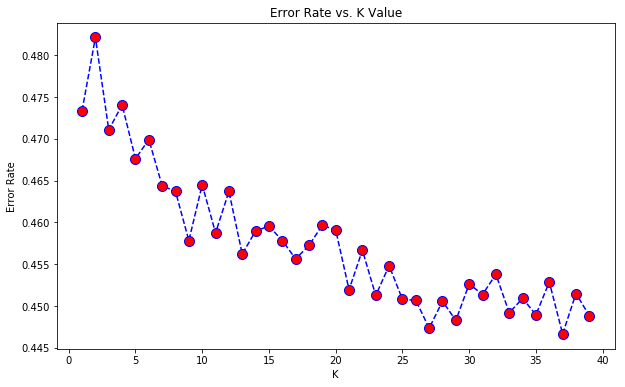

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),errors,color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [302]:
knn = KNeighborsClassifier(n_neighbors=37) # NOW WITH K=30

knn.fit(X_train,y_train)
pred_KNN = knn.predict(X_test)

In [303]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('WITH K=37')
print('\n')
print(accuracy_score(y_test,pred_KNN))
print('\n')
print(confusion_matrix(y_test,pred_KNN))
print('\n')
print(classification_report(y_test,pred_KNN))

WITH K=37


0.5472459091956672


[[2550 1691]
 [2238 2199]]


              precision    recall  f1-score   support

           0       0.53      0.60      0.56      4241
           1       0.57      0.50      0.53      4437

   micro avg       0.55      0.55      0.55      8678
   macro avg       0.55      0.55      0.55      8678
weighted avg       0.55      0.55      0.55      8678



In [304]:
gini_predictions = gini(y_test, pred_KNN)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, pred_KNN)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.026, Max. Gini: 0.244, Normalized Gini: 0.105


In [305]:
KNN_pred_prob = list(map(lambda x: x[1],knn.predict_proba(X_test)))

In [306]:
gini_predictions = gini(y_test, KNN_pred_prob)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, KNN_pred_prob)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.033, Max. Gini: 0.244, Normalized Gini: 0.136


In [ ]:
test_pred = knn.predict_proba(test.drop(['id','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat',
                          'ps_car_07_cat','ps_car_09_cat','ps_car_11','ps_car_12','ps_car_14','ps_ind_02_cat',
                          'ps_ind_04_cat','ps_ind_05_cat','ps_reg_03'], axis=1))

In [140]:
KNN_pred_prob = list(map(lambda x: x[1],test_pred))

In [141]:
submission = pd.concat([test['id'], pd.DataFrame({'target':KNN_pred_prob})], axis=1)
submission.to_csv('submission.csv', index=False)

# SVM Model

In [307]:
from sklearn.svm import SVC

In [308]:
SVC_Mod = SVC(C=2, gamma = 0.1, kernel='rbf')

In [309]:
SVC_Mod.fit(X_train, y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [310]:
pred_SVM = SVC_Mod.predict(X_test)

In [311]:
print(accuracy_score(y_test,pred_SVM))
print('\n')
print(confusion_matrix(y_test,pred_SVM))
print('\n')
print(classification_report(y_test,pred_SVM))

0.5419451486517631


[[2266 1975]
 [2000 2437]]


              precision    recall  f1-score   support

           0       0.53      0.53      0.53      4241
           1       0.55      0.55      0.55      4437

   micro avg       0.54      0.54      0.54      8678
   macro avg       0.54      0.54      0.54      8678
weighted avg       0.54      0.54      0.54      8678



In [312]:
gini_predictions = gini(y_test, pred_SVM)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, pred_SVM)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.022, Max. Gini: 0.244, Normalized Gini: 0.091


In [ ]:
'''SVC_pred_prob = list(map(lambda x: x[1],SVC_Mod.predict_proba(X_test)))'''

In [ ]:
'''gini_predictions = gini(y_test, SVC_pred_prob)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, SVC_pred_prob)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))'''

# SVM using Grid Search

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
param_grid = {'C' : [0.1,0.5,1,2,5], 'gamma' : [0.1, 0.01, 0.001, 1], 'kernel' : ['rbf','poly']}

In [149]:
Grid = GridSearchCV(SVC(),param_grid, cv=5, refit=True, verbose=3, n_jobs=-1)

In [ ]:
Grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
print(Grid.best_params_)
print(Grid.best_estimator_)

In [ ]:
pred_grid = Grid.predict(X_test)

In [ ]:
print(accuracy_score(y_test,pred_grid))
print('\n')
print(confusion_matrix(y_test,pred_grid))
print('\n')
print(classification_report(y_test,pred_grid))

# Using tensorflow estimator

In [225]:
import tensorflow as tf

In [226]:
feat_cols = []
for col in X_train_orig.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [227]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train_orig,y=y_train_orig,
                                                 batch_size=1000,num_epochs=5, shuffle=True)

In [260]:
classifier = tf.estimator.DNNClassifier(hidden_units=[54, 27, 10, 1], n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Supratik\\AppData\\Local\\Temp\\tmp1kwqos24', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002A41B42C9E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [261]:
classifier.train(input_fn=input_func,steps=50)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Supratik\AppData\Local\Temp\tmp1kwqos24\model.ckpt.
INFO:tensorflow:loss = 695.0956, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\Supratik\AppData\Local\Temp\tmp1kwqos24\model.ckpt.
INFO:tensorflow:Loss for final step: 693.6463.


In [262]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test_orig,batch_size=len(X_test_orig),shuffle=False)
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Supratik\AppData\Local\Temp\tmp1kwqos24\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [263]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [264]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [265]:
print(accuracy_score(y_test_orig,final_preds))
print('\n')
print(confusion_matrix(y_test_orig,final_preds))
print('\n')
print(classification_report(y_test_orig,final_preds))

0.48870707536298685


[[4241    0]
 [4437    0]]


              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4241
           1       0.00      0.00      0.00      4437

   micro avg       0.49      0.49      0.49      8678
   macro avg       0.24      0.50      0.33      8678
weighted avg       0.24      0.49      0.32      8678



C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Supratik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [266]:
# Gini with predicted probabilities
gini_predictions = gini(y_test_orig, final_preds)
gini_max = gini(y_test_orig, y_test_orig)
ngini= gini_normalized(y_test_orig, final_preds)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.003, Max. Gini: 0.244, Normalized Gini: 0.014


# Keras Neural Network

In [242]:
!pip install keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [243]:
# create model
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(71, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
seed = 7
np.random.seed(seed)

In [244]:
model.fit(X_train, y_train, epochs=100, batch_size=300)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
34710/34710 [==============================] - 1s 17us/step - loss: 0.2797
Epoch 2/100
34710/34710 [==============================] - 0s 11us/step - loss: 0.2407
Epoch 3/100
34710/34710 [==============================] - 0s 10us/step - loss: 0.2405
Epoch 4/100
34710/34710 [==============================] - 0s 9us/step - loss: 0.2402
Epoch 5/100
34710/34710 [==============================] - 0s 9us/step - loss: 0.2397
Epoch 6/100
34710/34710 [==============================] - 0s 9us/step - loss: 0.2392
Epoch 7/100
34710/34710 [==============================] - ETA: 0s - loss: 0.238 - 0s 9us/step - loss: 0.2386
Epoch 8/100
34710/34710 [==============================] - 0s 12us/step - loss: 0.2380
Epoch 9/100
34710/34710 [==============================] - 0s 14us/step - loss: 0.2373
Epoch 10/100
34710/34710 [==============================] - 0s 10us/step - loss: 0.2367
Epoch 11/100
34710/34710 [==============================] - 0

In [245]:
preds_keras = model.predict(X_test)

In [246]:
preds_keras=preds_keras.flatten()

In [247]:
gini_predictions = gini(y_test, preds_keras)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, preds_keras)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.035, Max. Gini: 0.244, Normalized Gini: 0.145


# Naive Bayes Classifier

In [237]:
from sklearn.naive_bayes import MultinomialNB

In [238]:
nbayes_model = MultinomialNB().fit(X_train_orig, y_train_orig)

In [239]:
y_pred = nbayes_model.predict(X_test_orig)

In [240]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [241]:
gini_predictions = gini(y_test, y_pred)
gini_max = gini(y_test, y_test)
ngini= gini_normalized(y_test, y_pred)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.029, Max. Gini: 0.244, Normalized Gini: 0.119
